In [1]:
import cv2
import matplotlib.pyplot as plt
import os


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p /content/plant_detection

In [5]:
!ls /content/drive/MyDrive

'CHAKSHU FINALIZED-520.mp4'  'Plant Detection.v1i.yolov11 (1).zip'
'Colab Notebooks'


In [6]:
!unzip "/content/drive/MyDrive/Plant Detection.v1i.yolov11 (1).zip" -d /content/plant_detection


Archive:  /content/drive/MyDrive/Plant Detection.v1i.yolov11 (1).zip
  inflating: /content/plant_detection/README.dataset.txt  
  inflating: /content/plant_detection/README.roboflow.txt  
  inflating: /content/plant_detection/data.yaml  
   creating: /content/plant_detection/test/
   creating: /content/plant_detection/test/images/
 extracting: /content/plant_detection/test/images/181_jpg.rf.d0109e712764f895f45c19d025792917.jpg  
 extracting: /content/plant_detection/test/images/205_jpg.rf.0d1af251db4d0db8f30ec10013596edf.jpg  
 extracting: /content/plant_detection/test/images/209_jpg.rf.7245271bb881faedfcde59424e080b0a.jpg  
 extracting: /content/plant_detection/test/images/225_jpg.rf.d2b01c0398c4a0f83ddca47cfb401db5.jpg  
 extracting: /content/plant_detection/test/images/22_jpg.rf.f1620e184b638f5a9704cf530a7294bb.jpg  
 extracting: /content/plant_detection/test/images/240_jpg.rf.51590dde70dd5542c567571a89def131.jpg  
 extracting: /content/plant_detection/test/images/246_jpg.rf.508ae47

In [7]:
!ls /content/plant_detection

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")


model.train(
    data='/content/plant_detection/data.yaml',
    epochs= 15,
    #patience=10,
    imgsz=640,
    device=0,
    #batch=16,
    )



100%|██████████| 5.35M/5.35M [00:00<00:00, 91.2MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/plant_detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256, 64, 1, False]           
 17                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/plant_detection/train/labels... 252 images, 0 backgrounds, 0 corrupt: 100%|██████████| 252/252 [00:00<00:00, 716.83it/s]

train: New cache created: /content/plant_detection/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.9±4.9 MB/s, size: 47.0 KB)


val: Scanning /content/plant_detection/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 688.41it/s]

val: New cache created: /content/plant_detection/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.28G      1.704      3.668      2.041         28        640: 100%|██████████| 16/16 [00:06<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         24         25    0.00631      0.964       0.12     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.42G      1.425      3.225      1.799         19        640: 100%|██████████| 16/16 [00:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         24         25    0.00724      0.964      0.423      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.44G      1.475      2.729      1.799         36        640: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         24         25    0.00488      0.887      0.493      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.45G       1.48      2.384      1.775         27        640: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         24         25     0.0044      0.923      0.338      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.47G      1.407      2.065      1.711         32        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         24         25      0.818      0.314      0.662      0.247


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.48G      1.324      2.665       1.99         12        640: 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         24         25      0.713      0.351      0.491      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       2.5G      1.222      2.418      1.826         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         24         25      0.608      0.244      0.402      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.51G      1.204      2.251      1.836         12        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         24         25      0.671      0.542      0.688      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.53G      1.201      2.093       1.83         12        640: 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         24         25      0.648      0.686      0.784      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.54G      1.074      1.985      1.673         12        640: 100%|██████████| 16/16 [00:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         24         25      0.717       0.67      0.709      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.56G     0.9702       1.78      1.576         12        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         24         25      0.845      0.687      0.799      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.57G     0.9195       1.65      1.539         12        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         24         25      0.872      0.844      0.881      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.58G     0.8521      1.569       1.45         12        640: 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         24         25      0.777      0.881      0.856      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15       2.6G     0.8041      1.489        1.4         12        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         24         25        0.9      0.837      0.905      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.62G     0.7324      1.472      1.333         12        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         24         25      0.942      0.855      0.896      0.453



15 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


                   all         24         25      0.942      0.856      0.896      0.453
             Aloe Vera          6          6      0.826      0.798      0.839      0.418
               Begonia          6          6          1      0.945      0.995      0.589
           Money Plant          6          6      0.942      0.833      0.895      0.305
     Rattlesnake Plant          6          7          1      0.847      0.855        0.5
Speed: 0.5ms preprocess, 2.3ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799aab719fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [11]:
model.val(
    data='/content/plant_detection/data.yaml',
    split='val',
    save=True,
    save_txt=True,
    save_conf=True,
    plots=True  # Ensures all plots including confusion matrix
)


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1250.7±395.4 MB/s, size: 45.5 KB)


val: Scanning /content/plant_detection/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.27s/it]


                   all         24         25      0.942      0.856      0.898      0.453
             Aloe Vera          6          6      0.826      0.798      0.848      0.417
               Begonia          6          6          1      0.946      0.995      0.589
           Money Plant          6          6      0.943      0.833      0.895      0.305
     Rattlesnake Plant          6          7          1      0.846      0.855        0.5
Speed: 0.3ms preprocess, 14.6ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x799bf365e850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [12]:
def display_image(path, title):
    if os.path.exists(path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"[⚠️] {title} not found at {path}")



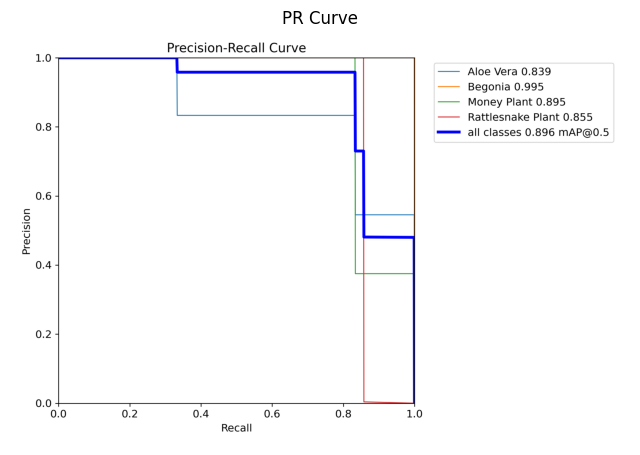

In [13]:
pr_curve_path = 'runs/detect/train/PR_curve.png'
display_image(pr_curve_path, 'PR Curve')


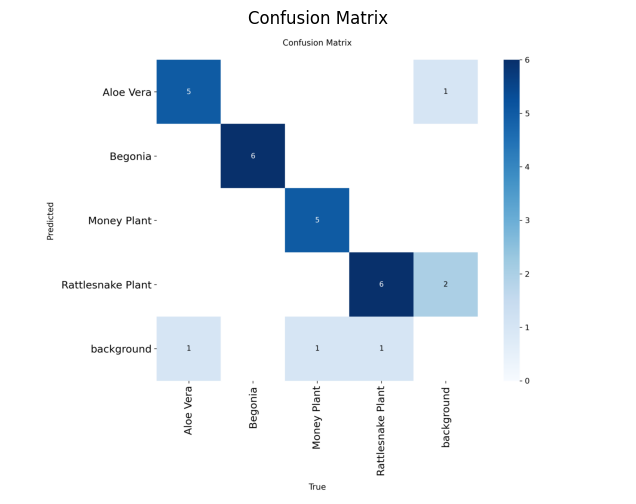

In [15]:
conf_matrix_path = 'runs/detect/train/confusion_matrix.png'
display_image(conf_matrix_path, 'Confusion Matrix')


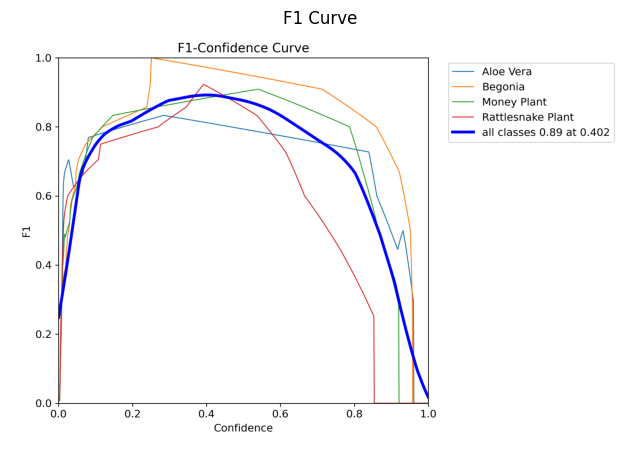

In [14]:
f1_curve_path = 'runs/detect/train/F1_curve.png'
display_image(f1_curve_path, 'F1 Curve')


In [17]:
# Load your trained model (best weights from training)
model = YOLO('runs/detect/train/weights/best.pt')
# Export to ONNX (optional)
model.export(format='onnx')  # Creates runs/detect/train/weights/best.onnx

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 10.3s, saved as 'runs/detect/train/weights/best.onnx' (10.1 MB)

Export complete (10.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=de

'runs/detect/train/weights/best.onnx'

In [20]:
import os
os.listdir()


['.config', 'yolo11n.pt', 'plant_detection', 'runs', 'drive', 'sample_data']

In [21]:
os.listdir('plant_detection')


['README.dataset.txt',
 'data.yaml',
 'test',
 'train',
 'README.roboflow.txt',
 'valid']

In [22]:
# Run prediction
results = model.predict(source='plant_detection/test/images/', save=True, conf=0.25)

# Output images will be saved under a new folder like runs/detect/predict or predict2 etc.



image 1/12 /content/plant_detection/test/images/181_jpg.rf.d0109e712764f895f45c19d025792917.jpg: 640x640 1 Rattlesnake Plant, 17.9ms
image 2/12 /content/plant_detection/test/images/205_jpg.rf.0d1af251db4d0db8f30ec10013596edf.jpg: 640x640 1 Rattlesnake Plant, 12.5ms
image 3/12 /content/plant_detection/test/images/209_jpg.rf.7245271bb881faedfcde59424e080b0a.jpg: 640x640 1 Rattlesnake Plant, 12.2ms
image 4/12 /content/plant_detection/test/images/225_jpg.rf.d2b01c0398c4a0f83ddca47cfb401db5.jpg: 640x640 1 Money Plant, 18.6ms
image 5/12 /content/plant_detection/test/images/22_jpg.rf.f1620e184b638f5a9704cf530a7294bb.jpg: 640x640 1 Aloe Vera, 16.4ms
image 6/12 /content/plant_detection/test/images/240_jpg.rf.51590dde70dd5542c567571a89def131.jpg: 640x640 1 Money Plant, 24.0ms
image 7/12 /content/plant_detection/test/images/246_jpg.rf.508ae47def11b2f8d0bd7b454f7d5032.jpg: 640x640 1 Money Plant, 14.3ms
image 8/12 /content/plant_detection/test/images/42_jpg.rf.ca827dd7e1cc51ec65ccf52b05e659c3.jpg:

In [23]:
# Zip the runs directory
!zip -r runs.zip runs

# Download the zip
from google.colab import files
files.download('runs.zip')


  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/R_curve.png (deflated 11%)
  adding: runs/detect/train/train_batch1.jpg (deflated 5%)
  adding: runs/detect/train/results.png (deflated 6%)
  adding: runs/detect/train/train_batch2.jpg (deflated 4%)
  adding: runs/detect/train/train_batch80.jpg (deflated 5%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.onnx (deflated 13%)
  adding: runs/detect/train/weights/last.pt (deflated 10%)
  adding: runs/detect/train/weights/best.pt (deflated 10%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 8%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train/F1_curve.png (deflated 8%)
  adding: runs/detect/train/train_batch0.jpg (deflated 8%)
  adding: runs/detect/train/confusion_matrix.png (deflated 28%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 25%)
  adding: r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>